In [7]:
import pandas as pd

df = pd.read_csv('saresp 2022 atualizado.csv', sep=';', encoding='latin1')

In [8]:
df.head()

,CD_ALUNO,NOMEDEP,RegiaoMetropolitana,DE,MUN,TIPOCLASSE,SERIE_ANO,SEXO,PERIODO,DEF1,...,DEF5,TOTAL_PONTO_LP,TOTAL_PONTO_MAT,TOTAL_PONTO_CIE,profic_lp,profic_mat,profic_cie,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,54425,ESTADUAL-SE,Interior,BIRIGUI,BURITAMA,0,EM-3ª série,M,TARDE,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,290674,ESTADUAL-SE,Interior,MIRANTE DO PARANAPANEMA,TARABAI,0,EM-3ª série,M,NOITE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,352167,ESTADUAL-OUT,Interior,BIRIGUI,BIRIGUI,0,EM-3ª série,M,MANHÃ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,415917,ESTADUAL-SE,Região Metropolitana do Vale do Paraíba e Lito...,PINDAMONHANGABA,PINDAMONHANGABA,0,EM-3ª série,F,NOITE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,422500,ESTADUAL-SE,Interior,ARARAQUARA,TRABIJU,0,EM-3ª série,F,NOITE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CD_ALUNO             999 non-null    int64  
 1   NOMEDEP              999 non-null    object 
 2   RegiaoMetropolitana  999 non-null    object 
 3   DE                   999 non-null    object 
 4   MUN                  999 non-null    object 
 5   TIPOCLASSE           999 non-null    int64  
 6   SERIE_ANO            999 non-null    object 
 7   SEXO                 999 non-null    object 
 8   PERIODO              999 non-null    object 
 9   DEF1                 148 non-null    float64
 10  DEF2                 23 non-null     float64
 11  DEF3                 23 non-null     float64
 12  DEF4                 1 non-null      float64
 13  DEF5                 0 non-null      float64
 14  TOTAL_PONTO_LP       517 non-null    float64
 15  TOTAL_PONTO_MAT      517 non-null    flo

In [10]:
coluna_sexo = df['SEXO'].value_counts()
print(coluna_sexo)

SEXO
M    600
F    399
Name: count, dtype: int64


In [11]:
coluna_ano = df['SERIE_ANO'].value_counts()
print(coluna_ano)

SERIE_ANO
EM-3ª série    940
9º Ano EF       49
5º Ano EF        5
2º Ano EF        5
Name: count, dtype: int64


In [16]:
# Verificar os tipos de dados das colunas
print(df[['profic_lp', 'profic_mat', 'profic_cie']].dtypes)

profic_lp     float64
profic_mat    float64
profic_cie     object
dtype: object


In [17]:
df['profic_cie'] = pd.to_numeric(df['profic_cie'], errors='coerce')

In [18]:
# Calcular a média de proficiência para todas as linhas
media_geral = df[['profic_lp', 'profic_mat', 'profic_cie']].mean()

print(media_geral)

profic_lp     227.661509
profic_mat    237.632495
profic_cie    245.963597
dtype: float64


In [19]:
print(df.head())

print(df['RegiaoMetropolitana'].value_counts())

print(df.columns)

print(df[['profic_lp', 'profic_mat', 'profic_cie']].isnull().sum())

   CD_ALUNO       NOMEDEP                                RegiaoMetropolitana  \
0     54425   ESTADUAL-SE                                           Interior   
1    290674   ESTADUAL-SE                                           Interior   
2    352167  ESTADUAL-OUT                                           Interior   
3    415917   ESTADUAL-SE  Região Metropolitana do Vale do Paraíba e Lito...   
4    422500   ESTADUAL-SE                                           Interior   

                        DE              MUN  TIPOCLASSE    SERIE_ANO SEXO  \
0                  BIRIGUI         BURITAMA           0  EM-3ª série    M   
1  MIRANTE DO PARANAPANEMA          TARABAI           0  EM-3ª série    M   
2                  BIRIGUI          BIRIGUI           0  EM-3ª série    M   
3          PINDAMONHANGABA  PINDAMONHANGABA           0  EM-3ª série    F   
4               ARARAQUARA          TRABIJU           0  EM-3ª série    F   

  PERIODO  DEF1  ...  DEF5  TOTAL_PONTO_LP  TOTAL_PONTO_

In [20]:
# Contagem de alunos por gênero
coluna_sexo = df['SEXO'].value_counts()
print(coluna_sexo)

# Calcular a média de proficiência por gênero
prof_por_genero = df.groupby('SEXO')[['profic_lp', 'profic_mat', 'profic_cie']].mean()

print(prof_por_genero)

SEXO
M    600
F    399
Name: count, dtype: int64
       profic_lp  profic_mat  profic_cie
SEXO                                    
F     228.049751  228.975124  239.497207
M     227.414557  243.139241  249.982639


In [21]:
# Contagem de alunos por série/ano
coluna_ano = df['SERIE_ANO'].value_counts()
print(coluna_ano)

# Média de proficiência por série/ano
prof_por_ano = df.groupby('SERIE_ANO')[['profic_lp', 'profic_mat', 'profic_cie']].mean()

print(prof_por_ano)

SERIE_ANO
EM-3ª série    940
9º Ano EF       49
5º Ano EF        5
2º Ano EF        5
Name: count, dtype: int64
              profic_lp  profic_mat  profic_cie
SERIE_ANO                                      
2º Ano EF    160.500000   172.00000         NaN
5º Ano EF    194.400000   191.00000  202.400000
9º Ano EF    245.740741   244.62963  276.923077
EM-3ª série  227.550936   238.27027  244.616972


In [22]:
# Cálculo da correlação entre as proficiências nas disciplinas
correlacao = df[['profic_lp', 'profic_mat', 'profic_cie']].corr()

print(correlacao)

            profic_lp  profic_mat  profic_cie
profic_lp    1.000000    0.573521    0.658317
profic_mat   0.573521    1.000000    0.562436
profic_cie   0.658317    0.562436    1.000000


In [23]:
# Média de proficiência por turno
prof_por_periodo = df.groupby('PERIODO')[['profic_lp', 'profic_mat', 'profic_cie']].mean()

print(prof_por_periodo)

          profic_lp  profic_mat  profic_cie
PERIODO                                    
MANHÃ    233.559809  241.162679  254.324742
NOITE    222.144737  234.842105  237.827586
TARDE    227.975000  236.362500  246.385714


In [32]:
import matplotlib.pyplot as plt


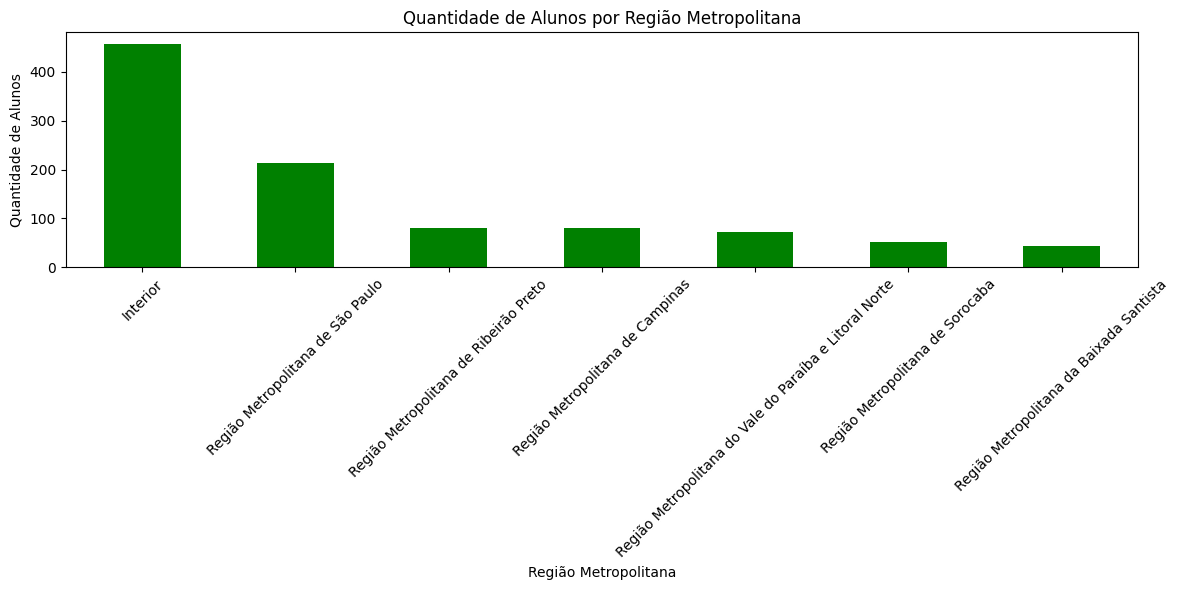

In [49]:
#  Alunos por região metropolitana
plt.figure(figsize=(12, 6))
contagem_regiao.plot(kind='bar', color='green')

plt.xlabel('Região Metropolitana')
plt.ylabel('Quantidade de Alunos')
plt.title('Quantidade de Alunos por Região Metropolitana')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

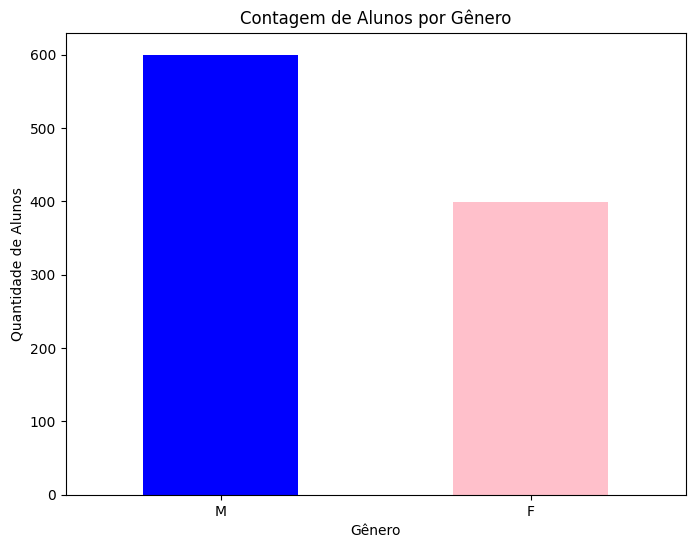

In [43]:
# Alunos por gênero
coluna_sexo = df['SEXO'].value_counts()

plt.figure(figsize=(8, 6))
coluna_sexo.plot(kind='bar', color=['blue', 'pink'])
plt.title('Contagem de Alunos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Alunos')
plt.xticks(rotation=0)
plt.show()

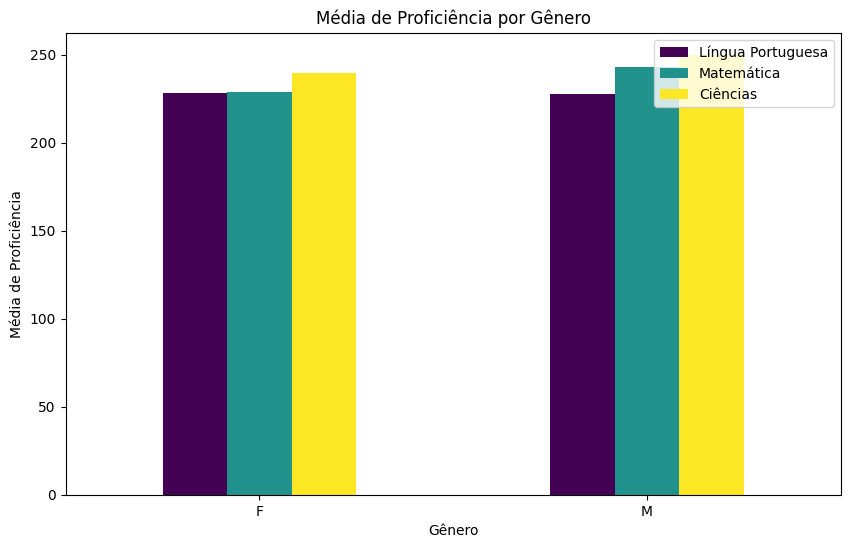

In [44]:
# Média de proficiência por gênero
prof_por_genero = df.groupby('SEXO')[['profic_lp', 'profic_mat', 'profic_cie']].mean()

prof_por_genero.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Média de Proficiência por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Proficiência')
plt.xticks(rotation=0)
plt.legend(['Língua Portuguesa', 'Matemática', 'Ciências'], loc='upper right')
plt.show()

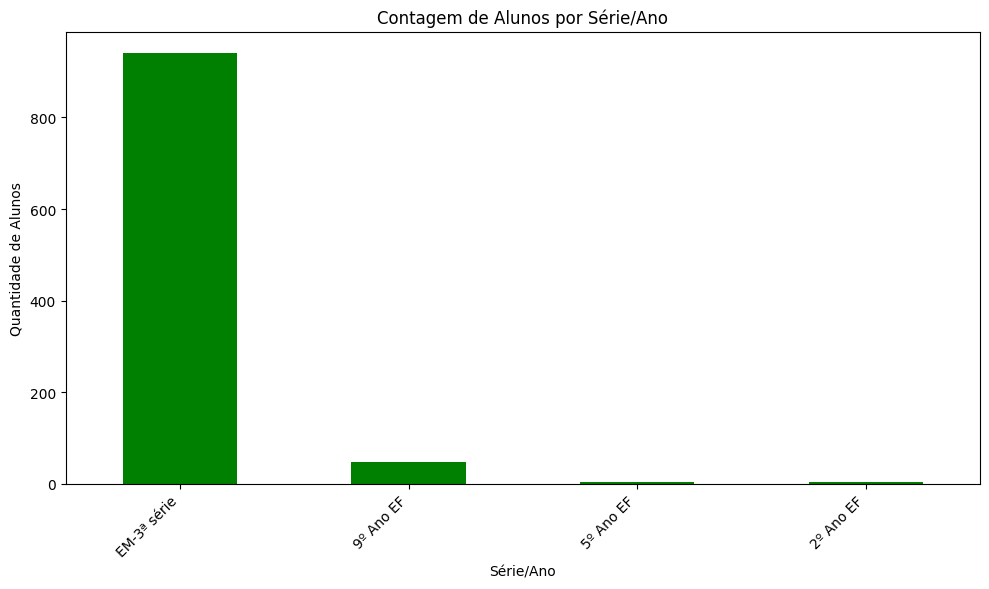

In [45]:
# Alunos por série/ano
coluna_ano = df['SERIE_ANO'].value_counts()

plt.figure(figsize=(10, 6))
coluna_ano.plot(kind='bar', color='green')
plt.title('Contagem de Alunos por Série/Ano')
plt.xlabel('Série/Ano')
plt.ylabel('Quantidade de Alunos')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

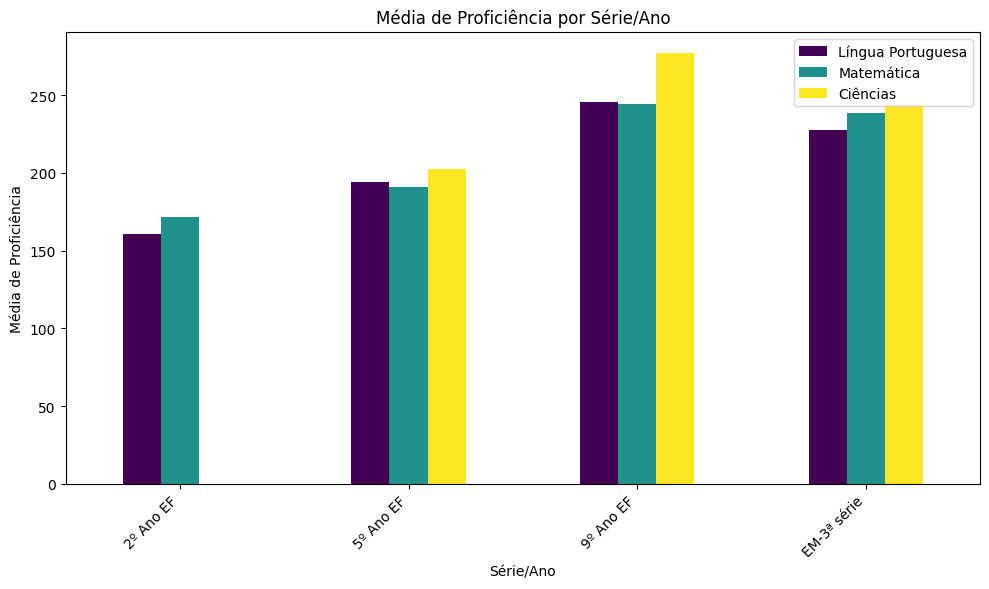

In [46]:
# Média de proficiência por série/ano
prof_por_ano = df.groupby('SERIE_ANO')[['profic_lp', 'profic_mat', 'profic_cie']].mean()

prof_por_ano.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Média de Proficiência por Série/Ano')
plt.xlabel('Série/Ano')
plt.ylabel('Média de Proficiência')
plt.xticks(rotation=45, ha='right')  
plt.legend(['Língua Portuguesa', 'Matemática', 'Ciências'], loc='upper right')
plt.tight_layout()
plt.show()

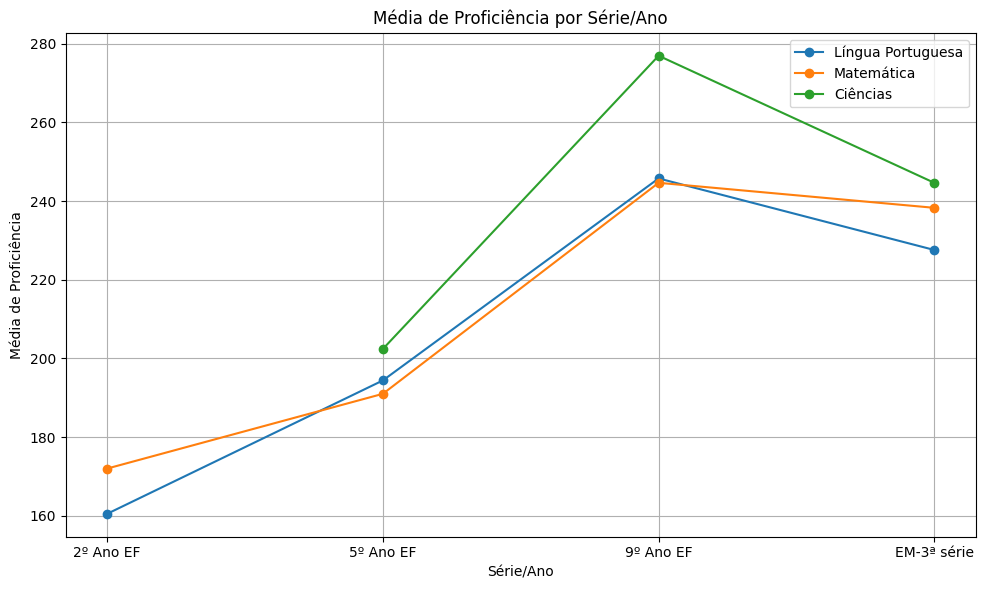

In [50]:
# Proficiência por série/ano (ou turno)
prof_por_ano = df.groupby('SERIE_ANO')[['profic_lp', 'profic_mat', 'profic_cie']].mean()

plt.figure(figsize=(10, 6))
plt.plot(prof_por_ano.index, prof_por_ano['profic_lp'], label='Língua Portuguesa', marker='o')
plt.plot(prof_por_ano.index, prof_por_ano['profic_mat'], label='Matemática', marker='o')
plt.plot(prof_por_ano.index, prof_por_ano['profic_cie'], label='Ciências', marker='o')

plt.title('Média de Proficiência por Série/Ano')
plt.xlabel('Série/Ano')
plt.ylabel('Média de Proficiência')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

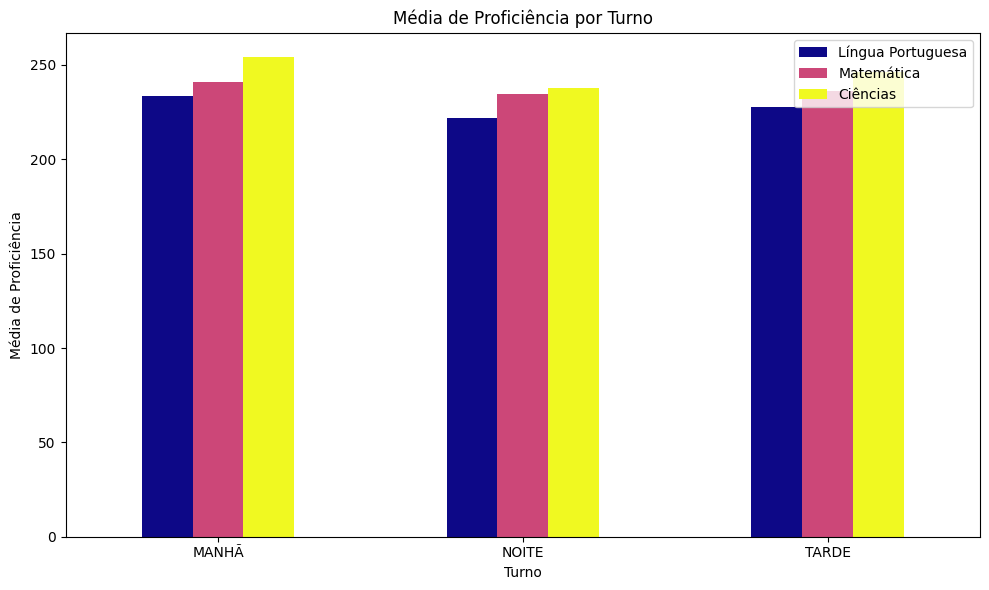

In [51]:
# Proficiência por turno
prof_por_periodo = df.groupby('PERIODO')[['profic_lp', 'profic_mat', 'profic_cie']].mean()

prof_por_periodo.plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title('Média de Proficiência por Turno')
plt.xlabel('Turno')
plt.ylabel('Média de Proficiência')
plt.xticks(rotation=0)  
plt.legend(['Língua Portuguesa', 'Matemática', 'Ciências'], loc='upper right')
plt.tight_layout()
plt.show()